Copyright 2021 DeepMind Technologies Limited

Licensed under the Apache License, Version 2.0 (the "License")

# DQN Zoo plots

In [ ]:
# @title Licence {form-width: '30%'}

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import os.path

import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [132]:
# @title Defaults {run:"auto", form-width: '30%'}

backend_format = "retina"  # @param ["retina", ""]
%config InlineBackend.figure_format = backend_format

sns.set_context("notebook")
sns.set_style("ticks")

plt.rcParams['ytick.right'] = True
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0


In [ ]:
!wget https://github.com/deepmind/dqn_zoo/raw/master/results.tar.gz

In [ ]:
!tar -xvf results.tar.gz

In [133]:
experiments = dict(
    together=[
        dict(
            agent_id='dqn',
            agent_name='DQN',
            color='grey'),
        # dict(
        #     agent_id='double_q',
        #     agent_name='Double DQN',
        #     color='purple',
        #     location=None),
        dict(
            agent_id='prioritized',
            agent_name='Prioritized DQN',
            color='blue'),
        # dict(
        #     agent_id='c51',
        #     agent_name='C51',
        #     color='orange',
        #     location=None),
        # dict(
        #     agent_id='qrdqn',
        #     agent_name='QR-DQN',
        #     color='red',
        #     location=None),
        # dict(
        #     agent_id='rainbow',
        #     agent_name='Rainbow',
        #     color='black',
        #     location=None),
        # dict(
        #     agent_id='iqn',
        #     agent_name='IQN',
        #     color='green',
        #     location=None),
    ],
    separate=[
        dict(
            agents=[
                dict(
                    agent_id='metasize_10',
                    agent_name='MGSCDQN size=10',
                    color='red',
                    seeds=range(0,5)),
                dict(
                    agent_id='metasize_100',
                    agent_name='MGSCDQN size=100',
                    color='green',
                    seeds=range(0,5)),
            ],
            location='results/mgscdqn_batched_100m',
        ),
        dict(
            agents=[
                dict(
                    agent_id='metasize_100',
                    agent_name='MGSCDQN Reservoir size=100',
                    color='purple',
                    seeds=range(0,5)),
            ],
            location='results/mgscdqn_batched_reservoir',
        ),
    ]
)

In [134]:
# @title Game names {'form-width': '30%'}

GAME_NAMES = [
    ('alien', 'Alien'),
    ('amidar', 'Amidar'),
    ('assault', 'Assault'),
    ('asterix', 'Asterix'),
    ('asteroids', 'Asteroids'),
    ('atlantis', 'Atlantis'),
    ('bank_heist', 'Bank Heist'),
    ('battle_zone', 'Battlezone'),
    ('beam_rider', 'Beam Rider'),
    ('berzerk', 'Berzerk'),
    ('bowling', 'Bowling'),
    ('boxing', 'Boxing'),
    ('breakout', 'Breakout'),
    ('centipede', 'Centipede'),
    ('chopper_command', 'Chopper Command'),
    ('crazy_climber', 'Crazy Climber'),
    ('defender', 'Defender'),
    ('demon_attack', 'Demon Attack'),
    ('double_dunk', 'Double Dunk'),
    ('enduro', 'Enduro'),
    ('fishing_derby', 'Fishing Derby'),
    ('freeway', 'Freeway'),
    ('frostbite', 'Frostbite'),
    ('gopher', 'Gopher'),
    ('gravitar', 'Gravitar'),
    ('hero', 'H.E.R.O.'),
    ('ice_hockey', 'Ice Hockey'),
    ('jamesbond', 'James Bond 007'),
    ('kangaroo', 'Kangaroo'),
    ('krull', 'Krull'),
    ('kung_fu_master', 'Kung-Fu Master'),
    ('montezuma_revenge', 'Montezuma’s Revenge'),
    ('ms_pacman', 'Ms. Pac-Man'),
    ('name_this_game', 'Name This Game'),
    ('phoenix', 'Phoenix'),
    ('pitfall', 'Pitfall!'),
    ('pong', 'Pong'),
    ('private_eye', 'Private Eye'),
    ('qbert', 'Q*bert'),
    ('riverraid', 'River Raid'),
    ('road_runner', 'Road Runner'),
    ('robotank', 'Robotank'),
    ('seaquest', 'Seaquest'),
    ('skiing', 'Skiing'),
    ('solaris', 'Solaris'),
    ('space_invaders', 'Space Invaders'),
    ('star_gunner', 'Stargunner'),
    ('surround', 'Surround'),
    ('tennis', 'Tennis'),
    ('time_pilot', 'Time Pilot'),
    ('tutankham', 'Tutankham'),
    ('up_n_down', 'Up’n Down'),
    ('venture', 'Venture'),
    ('video_pinball', 'Video Pinball'),
    ('wizard_of_wor', 'Wizard of Wor'),
    ('yars_revenge', 'Yars’ Revenge'),
    ('zaxxon', 'Zaxxon'),
]
GAME_NAME_MAP = dict(GAME_NAMES)

In [20]:
def load_experiment_data_from_results_csv_dir(experiment_details, results_dir):
  df_exps = []
  # Do the CSV files that were included with DQNZoo
  for ed in experiment_details['together']:
    csv_file = os.path.join(results_dir, ed['agent_id'] + '.csv')
    with open(csv_file, 'r') as f:
      df = pd.read_csv(f, index_col=0)
    df = df.assign(agent_id=ed['agent_id'], agent_name=ed['agent_name'])
    df_exps.append(df)
  # Do our own CSV files that are separated into seeds
  for sepexp in experiment_details['separate']:
    for ed in sepexp['agents']:
      for env_name in os.listdir(os.path.join(results_dir, sepexp['location'])):
        for seed in ed['seeds']:
          csv_file = os.path.join(results_dir, sepexp['location'], env_name, ed['agent_id'], f'seed_{seed}.csv')
          with open(csv_file, 'r') as f:
            df = pd.read_csv(f, index_col=False)
          df = df.assign(agent_id=ed['agent_id'], agent_name=ed['agent_name'], seed=seed + 1, environment_name=env_name)
          df_exps.append(df)
  df_exp = pd.concat(df_exps, sort=True).reset_index(drop=True)
  return df_exp


In [137]:
# df_exp_raw = load_experiment_data_from_results_csv_dir(experiments, '.')
df_exp_raw = load_experiment_data_from_results_csv_dir(experiments, '/Users/kapeluck/Documents/MSc/DQNMGSC/data/dqn_zoo_results')

In [138]:
def moving_average(values, window_size):
  # numpy.convolve uses zero for initial missing values, so is not suitable.
  numerator = np.nancumsum(values)
  # The sum of the last window_size values.
  numerator[window_size:] = numerator[window_size:] - numerator[:-window_size]
  denominator = np.ones(len(values)) * window_size
  denominator[:window_size] = np.arange(1, window_size + 1)
  smoothed = numerator / denominator
  assert values.shape == smoothed.shape
  return smoothed


def smooth(df, smoothing_window, index_columns, columns):
  dfg = df.groupby(index_columns)
  for col in columns:
    df[col] = dfg[col].transform(
        lambda s: moving_average(s.values, smoothing_window))
  return df


def environment_pretty(row):
  return GAME_NAME_MAP[row['environment_name']]


def add_columns(df):
  df['environment_pretty'] = df.apply(environment_pretty, axis=1)
  df['frame_millions'] = df['frame'] // int(1e6)
  return df


def smooth_dataframe(df):
  return smooth(
      df,
      smoothing_window=10,
      index_columns=['agent_id', 'environment_name', 'seed'],
      columns=[
          'eval_frame_rate',
          'train_frame_rate',
          'eval_episode_return',
          'train_episode_return',
          'normalized_return',
      ])

In [140]:
df_exp = df_exp_raw.pipe(add_columns).pipe(smooth_dataframe)
df = df_exp.sort_values(by=['agent_id', 'environment_name', 'seed', 'frame'])

In [141]:
df_exp_smoothed = smooth(
    df_exp_raw.pipe(add_columns),
    smoothing_window=10,
    index_columns=['agent_id', 'environment_name'], # omit seed as part of the GROUP BY
    columns=[
          'eval_frame_rate',
          'train_frame_rate',
          'eval_episode_return',
          'train_episode_return',
          'normalized_return',
    ]).sort_values(by=['agent_id', 'environment_name', 'seed', 'frame'])

In [72]:
df[(df.agent_id == 'metasize_10') & (df.environment_name == 'alien') & (df.seed == 1)].dropna(how='all')

agent_id       agent_name  capped_normalized_return  \
114763  metasize_10  MGSCDQN size=10                 -0.004803   
114764  metasize_10  MGSCDQN size=10                 -0.012321   
114765  metasize_10  MGSCDQN size=10                 -0.017986   
114766  metasize_10  MGSCDQN size=10                 -0.013321   
114767  metasize_10  MGSCDQN size=10                  0.000684   
...             ...              ...                       ...   
114956  metasize_10  MGSCDQN size=10                  0.270645   
114957  metasize_10  MGSCDQN size=10                  0.241105   
114958  metasize_10  MGSCDQN size=10                  0.301600   
114959  metasize_10  MGSCDQN size=10                  0.302653   
114960  metasize_10  MGSCDQN size=10                  0.267706   

       environment_name  eval_episode_return  eval_frame_rate  \
114763            alien           194.661654      2413.298180   
114764            alien           181.692669      2408.122846   
114765            alien           170.144730      2405.822895   
114766            alien           163.672996      2403.676312   
114767            alien           163.320470      2402.544736   
...                 ...                  ...              ...   
114956            alien          1908.760586      2422.059616   
114957            alien          1924.841939      2422.285021   
114958            alien          1945.963799      2422.392293   
114959            alien          1965.884282      2422.269369   
114960            alien          1988.258746      2422.135470   

        eval_num_episodes      frame  human_gap  importance_sampling_exponent  \
114763                266          0   1.004803                           NaN   
114764                280    1000000   1.012321                           NaN   
114765                246    2000000   1.017986                           NaN   
114766                260    3000000   1.013321                           NaN   
114767                242    4000000   0.999316                           NaN   
...                   ...        ...        ...                           ...   
114956                111  193000000   0.729355                           NaN   
114957                114  194000000   0.758895                           NaN   
114958                109  195000000   0.698400                           NaN   
114959                102  196000000   0.697347                           NaN   
114960                 95  197000000   0.732294                           NaN   

        ...  max_seen_priority  normalized_return  seed  train_episode_return  \
114763  ...                NaN          -0.004803     1              0.000000   
114764  ...                NaN          -0.006682     1             50.397878   
114765  ...                NaN          -0.008356     1             83.293842   
114766  ...                NaN          -0.009294     1            110.656483   
114767  ...                NaN          -0.009345     1            134.898620   
...     ...                ...                ...   ...                   ...   
114956  ...                NaN           0.243621     1           1857.446933   
114957  ...                NaN           0.245952     1           1873.414742   
114958  ...                NaN           0.249013     1           1890.626222   
114959  ...                NaN           0.251900     1           1908.597263   
114960  ...                NaN           0.255143     1           1926.253478   

        train_exploration_epsilon  train_frame_rate  train_num_episodes  \
114763                      1.000          0.000000                   0   
114764                      0.820        125.189272                 377   
114765                      0.595        188.078856                 383   
114766                      0.370        227.755260                 379   
114767                      0.145        255.424365                 402   
...                           ...        

In [142]:
def make_agent_hue_kws(experiments):
  pairs = [(exp['agent_name'], exp['color']) for exp in experiments['together']]
  for sepexp in experiments['separate']:
    pairs += [(exp['agent_name'], exp['color']) for exp in sepexp['agents']]
  agent_names, colors = zip(*pairs)
  hue_kws = dict(color=colors)
  return list(agent_names), hue_kws


def plot_individual(df, agent_names, hue_kws):
  g = sns.FacetGrid(
      df.query('agent_name == %s' % agent_names),
      row=None,
      col='environment_pretty',
      hue='agent_name',
      height=2.5,
      aspect=1.5,
      col_wrap=3,
      hue_order=agent_names,
      sharey=False,
      hue_kws=hue_kws,
  )

  g.map(
      sns.lineplot,
      'frame_millions',
      'eval_episode_return',
      estimator=np.median,
      errorbar=('ci', 100),
      alpha=0.5,
      linewidth=3,
  )

  g.set_titles('{col_name}')
  g.despine(left=False, top=True, right=False, bottom=False)
  g.set_axis_labels('Frame (millions)', '')

  for ax in g.axes:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))

  g.fig.set_facecolor('white')
  g.fig.tight_layout()

  # Create legend from the final axes.
  legend_x_margin = 0.03
  legend_y_offset_inches = -0.4
  legend_y_offset = legend_y_offset_inches / g.fig.get_figheight()
  g.axes[-1].legend(
      bbox_to_anchor=(
          legend_x_margin,
          legend_y_offset,
          1 - 2 * legend_x_margin,
          0,
      ),
      bbox_transform=g.fig.transFigure,
      mode='expand',
      ncol=10,
      borderaxespad=0,
      loc='lower center',
      frameon=False,
  )
  return g


In [144]:
df.query("environment_name == 'alien'").query("agent_id == 'dqn'")

agent_id agent_name  capped_normalized_return environment_name  \
0         dqn        DQN                 -0.015561            alien   
1         dqn        DQN                 -0.018051            alien   
2         dqn        DQN                 -0.011202            alien   
3         dqn        DQN                 -0.011638            alien   
4         dqn        DQN                  0.026308            alien   
...       ...        ...                       ...              ...   
1000      dqn        DQN                  0.208836            alien   
1001      dqn        DQN                  0.314208            alien   
1002      dqn        DQN                  0.320875            alien   
1003      dqn        DQN                  0.373400            alien   
1004      dqn        DQN                  0.253865            alien   

      eval_episode_return  eval_frame_rate  eval_num_episodes      frame  \
0              120.430108      1206.341956                279          0   
1              116.135081      1209.139225                240    1000000   
2              118.999801      1212.073076                197    2000000   
3              121.855333      1214.247749                284    3000000   
4              134.724591      1215.616624                206    4000000   
...                   ...              ...                ...        ...   
1000          1899.127524      1361.110134                 96  196000000   
1001          1922.383761      1359.414877                 81  197000000   
1002          1955.901269      1357.946430                 72  198000000   
1003          1997.307062      1356.854000                 71  199000000   
1004          2031.403967      1358.646238                 90  200000000   

      human_gap  importance_sampling_exponent  ...  max_seen_priority  \
0      1.015561                           NaN  ...                NaN   
1      1.018051                           NaN  ...                NaN   
2      1.011202                           NaN  ...                NaN   
3      1.011638                           NaN  ...                NaN   
4      0.973692                           NaN  ...                NaN   
...         ...                           ...  ...                ...   
1000   0.791164                           NaN  ...                NaN   
1001   0.685792                           NaN  ...                NaN   
1002   0.679125                           NaN  ...                NaN   
1003   0.626600                           NaN  ...                NaN   
1004   0.746135                           NaN  ...                NaN   

      normalized_return  seed  train_episode_return  \
0             -0.015561     1              0.000000   
1             -0.016184     1             51.187335   
2             -0.015768     1             84.163002   
3             -0.015355     1            111.071151   
4             -0.013489     1            135.978446   
...                 ...   ...                   ...   
1000           0.242225     5           1825.561166   
1001           0.245595     5           1846.397636   
1002           0.250453     5           1873.633307   
1003           0.256454     5           1905.903659   
1004           0.261396     5           1937.619876   

      train_exploration_epsilon  train_frame_rate  train_num_episodes  \
0                         1.000          0.000000                   0   
1                         0.820        221.818352                 379   
2                         0.595        340.741135                 379   
3                         0.370        417.626590                 386   
4                         0.145        472.229389                 409   
...                         ...               ...                 ...   
1000                      0.100        907.815342                 177   
1001                      0.100        907.816197                 180   
1002                      0.100        908.0

(3717, 21)


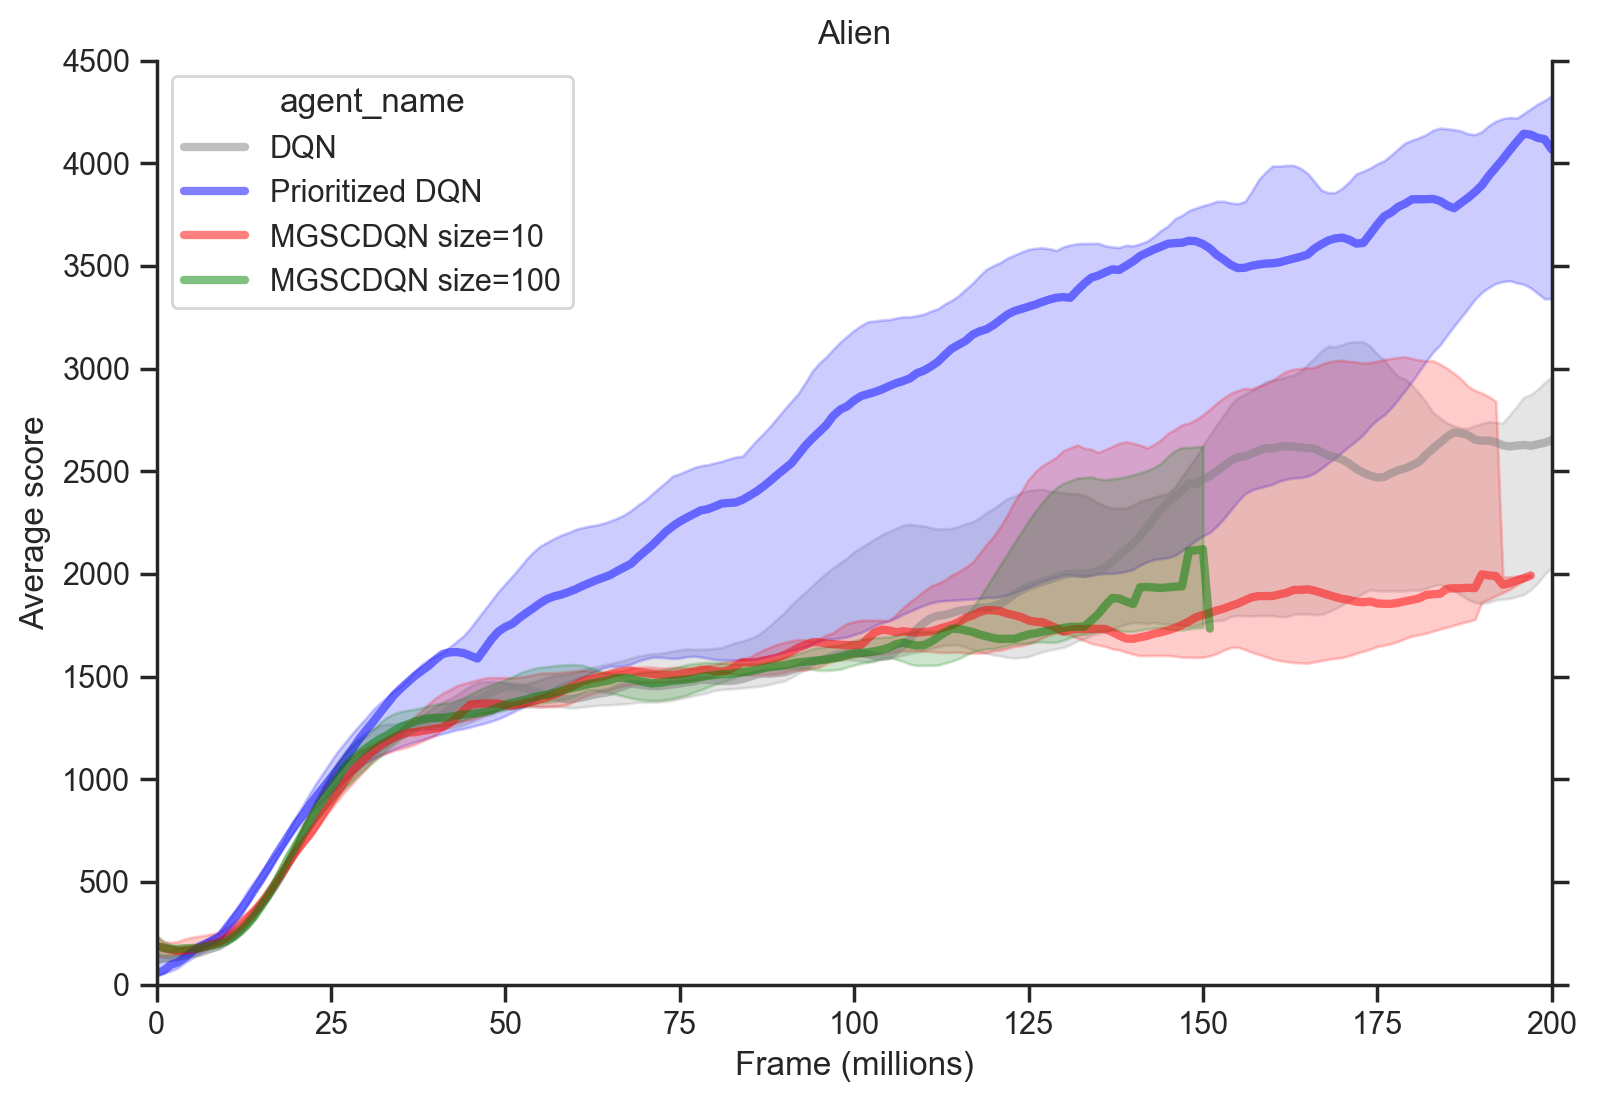

In [145]:
def plot_single_env(df, experiments, agent_ids, environment):
    experiments = [*experiments['together'], *[sepexp['agents'] for sepexp in experiments['separate']]]
    experiment_triples = [(exp['agent_id'], exp['agent_name'], exp['color']) for exp in experiments]
    experiment_doubles = [(t[1], t[2]) for t in experiment_triples if t[0] in agent_ids]
    agent_names, colors = zip(*experiment_doubles)
    agent_names = list(agent_names)
    hue_kws = dict(color=colors)

    df = df.query(f"environment_name == '{environment}'").query('agent_name == %s' % agent_names)
    # df = df[df.environment_name == environment].groupby(['agent_name', 'frame', 'seed']).median().reset_index()
    print(df.shape)

    fig, ax = plt.subplots(figsize=(9, 6))
    g = sns.lineplot(
        # df,
        x=df['frame_millions'],
        y=df['eval_episode_return'],
        hue=df['agent_name'],
        estimator=np.median,
        errorbar=('ci', 100),
        alpha=0.5,
        linewidth=3,
        hue_order=agent_names,
        palette=hue_kws['color'],
        legend='brief',
        ax=ax,
    )
    ax.set_title(GAME_NAME_MAP[environment])
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.set_xlabel('Frame (millions)')
    ax.set_ylabel('Average score')
    return g

agent_ids = ['prioritized', 'dqn', 'metasize_10', 'metasize_100']
environment = 'alien'
plot_single_env(df, experiments, agent_ids, environment)
pass

In [146]:
def seeded_name(name, seed):
     return f"{name} seed={seed}"

def add_seed_to_name(df, agent_ids):
     def add_seed_to_name_row(row):
          if row['agent_id'] in agent_ids:
               return seeded_name(row['agent_name'], row['seed'])
          else:
               return row['agent_name']
     ret = df.copy()
     ret['agent_name'] = df.apply(add_seed_to_name_row, axis=1)
     return ret
# Do a little test of renaming the DQN agents to have seeds in the name
df.pipe(add_seed_to_name, ['dqn']).query("agent_id == 'dqn'").dropna(how='all').agent_name.unique()

array(['DQN seed=1', 'DQN seed=2', 'DQN seed=3', 'DQN seed=4',
       'DQN seed=5'], dtype=object)

In [157]:
df[(df.agent_name == 'DQN') & (df.frame == int(2e6)) & (df.environment_name == 'alien')].dropna(how='all')

agent_id agent_name  capped_normalized_return environment_name  \
2        dqn        DQN                 -0.011202            alien   
203      dqn        DQN                 -0.013923            alien   
404      dqn        DQN                 -0.014208            alien   
605      dqn        DQN                 -0.014779            alien   
806      dqn        DQN                 -0.007952            alien   

     eval_episode_return  eval_frame_rate  eval_num_episodes    frame  \
2             118.999801      1212.073076                197  2000000   
203           130.791376      1196.348820                254  2000000   
404           153.948284      1242.127695                255  2000000   
605           123.777965      1430.236365                278  2000000   
806           166.170800      1503.900290                225  2000000   

     human_gap  importance_sampling_exponent  ...  max_seen_priority  \
2     1.011202                           NaN  ...                NaN   
203   1.013923                           NaN  ...                NaN   
404   1.014208                           NaN  ...                NaN   
605   1.014779                           NaN  ...                NaN   
806   1.007952                           NaN  ...                NaN   

     normalized_return  seed  train_episode_return  train_exploration_epsilon  \
2            -0.015768     1             84.163002                      0.595   
203          -0.014059     2             83.367243                      0.595   
404          -0.010703     3             85.263631                      0.595   
605          -0.015076     4             82.413550                      0.595   
806          -0.008932     5             83.604797                      0.595   

     train_frame_rate  train_num_episodes  train_state_value  \
2          340.741135                 379                NaN   
203        335.046627                 376                NaN   
404        346.524776                 377                NaN   
605        401.858506                 384                NaN   
806        410.072138                 374                NaN   

     environment_pretty frame_millions  
2                 Alien              2  
203               Alien              2  
404               Alien              2  
605               Alien              2  
806               Alien              2  

[5 rows x 21 columns]

(3717, 21)


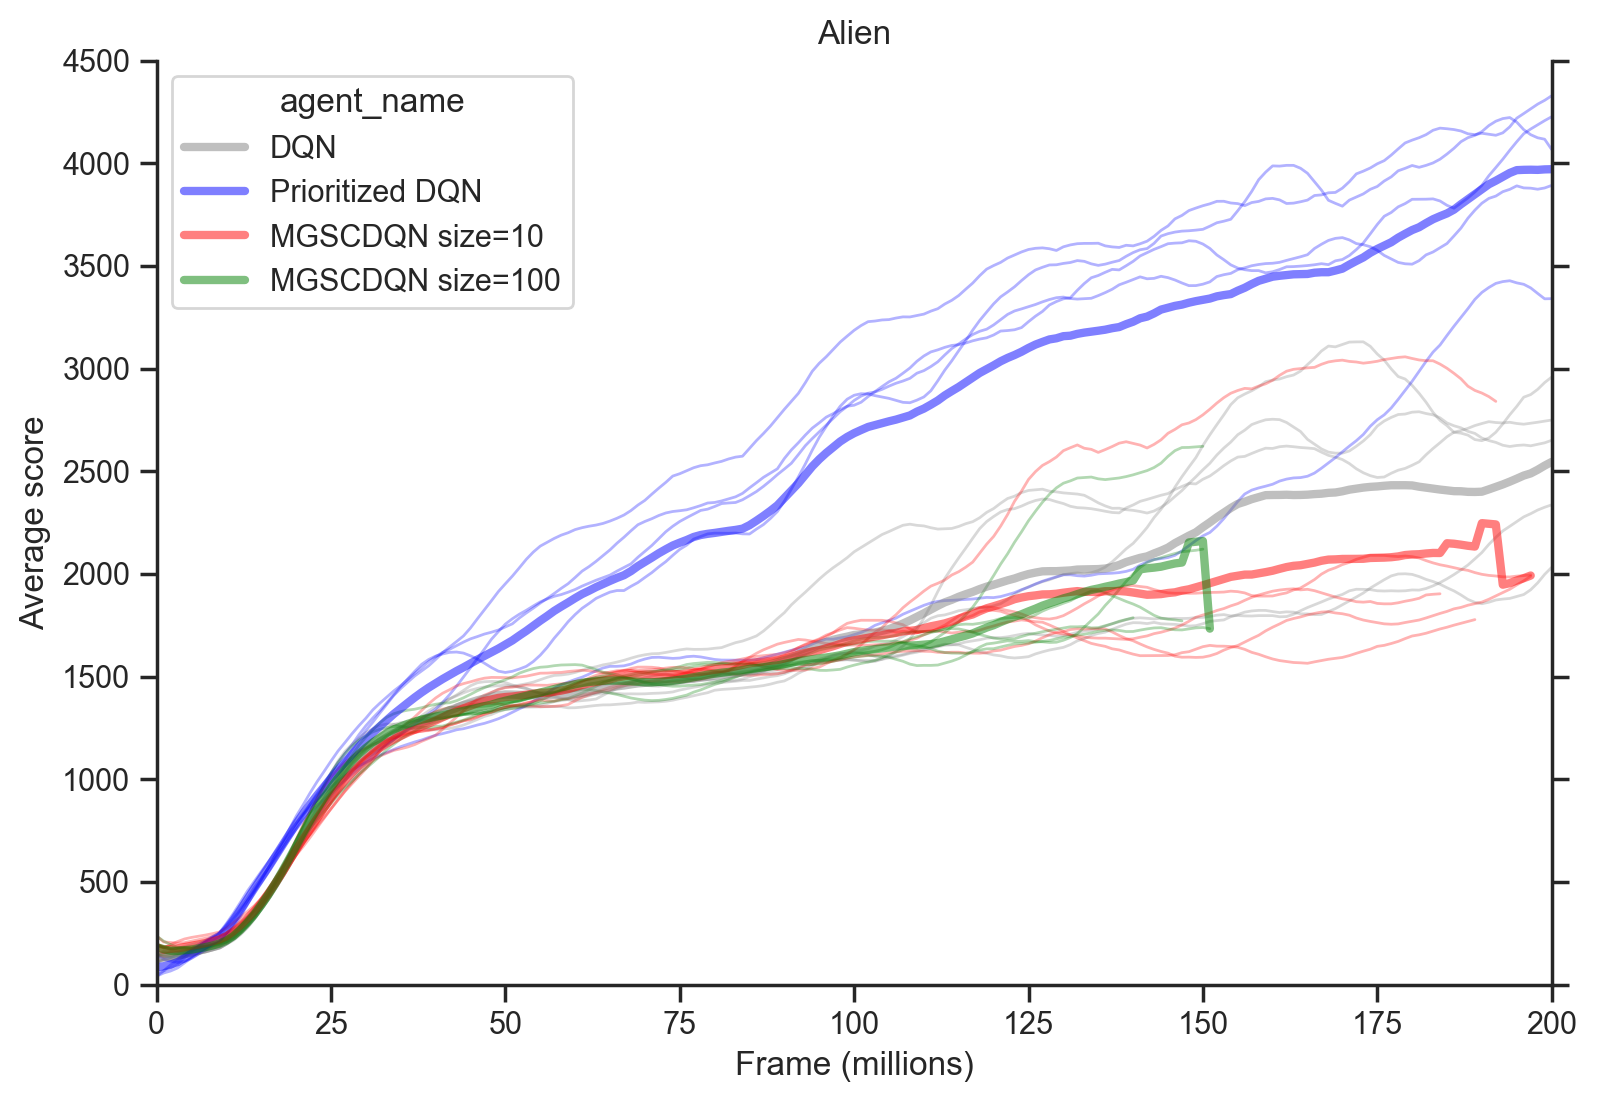

In [159]:
def plot_single_env_all_seeds(df, experiments, agent_ids_grouped, agent_ids_all_seeds, environment):
    seed_name_df = df.pipe(add_seed_to_name, agent_ids_all_seeds)
    experiments = [*experiments['together'], *[sepexp['agents'] for sepexp in experiments['separate']]]
    agent_ids = agent_ids_grouped + agent_ids_all_seeds
    agent_names = []
    agent_colors = []
    for exp in experiments:
        if exp['agent_id'] in agent_ids_grouped:
            agent_names.append(exp['agent_name'])
            agent_colors.append(exp['color'])
        elif exp['agent_id'] in agent_ids_all_seeds:
            # if 'seeds' in exp:
            #     for seed in exp['seeds']:
            #         agent_names.append(seeded_name(exp['agent_name'], seed))
            #         hue_kws['color'].append(exp['color']) # this makes all seeds the same color but that's fine for now
            # else:
            for seed in df.query(f"agent_name == {repr(exp['agent_name'])}").seed.unique():
                agent_names.append(seeded_name(exp['agent_name'], seed))
                agent_colors.append(exp['color']) # this makes all seeds the same color but that's fine for now

    seed_name_df = seed_name_df.query(f"environment_name == '{environment}'").query('agent_name == %s' % agent_names)
    df = df.query(f"environment_name == '{environment}'")
    # df = df[df.environment_name == environment].groupby(['agent_name', 'frame', 'seed']).median().reset_index()
    print(seed_name_df.shape)

    fig, ax = plt.subplots(figsize=(9, 6))
    g = sns.lineplot(
        # df,
        x=seed_name_df['frame_millions'],
        y=seed_name_df['eval_episode_return'],
        hue=seed_name_df['agent_name'],
        estimator=None,
        errorbar=None,
        alpha=0.3,
        linewidth=1,
        hue_order=agent_names,
        palette=agent_colors,
        legend=None,
        ax=ax,
    )
    g = sns.lineplot(
        x=df['frame_millions'],
        y=df['eval_episode_return'],
        hue=df['agent_name'],
        estimator=np.mean,
        errorbar=None,
        alpha=0.5,
        linewidth=3,
        hue_order=[exp['agent_name'] for exp in experiments if exp['agent_id'] in agent_ids],
        palette=[exp['color'] for exp in experiments if exp['agent_id'] in agent_ids],
        legend='brief',
        ax=ax,
    )
    ax.set_title(GAME_NAME_MAP[environment])
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.set_xlabel('Frame (millions)')
    ax.set_ylabel('Average score')
    return g

agent_ids_grouped = []
agent_ids_all_seeds = ['prioritized', 'dqn', 'metasize_10', 'metasize_100']
environment = 'alien'
plot_single_env_all_seeds(df, experiments, agent_ids_grouped, agent_ids_all_seeds, environment)
pass

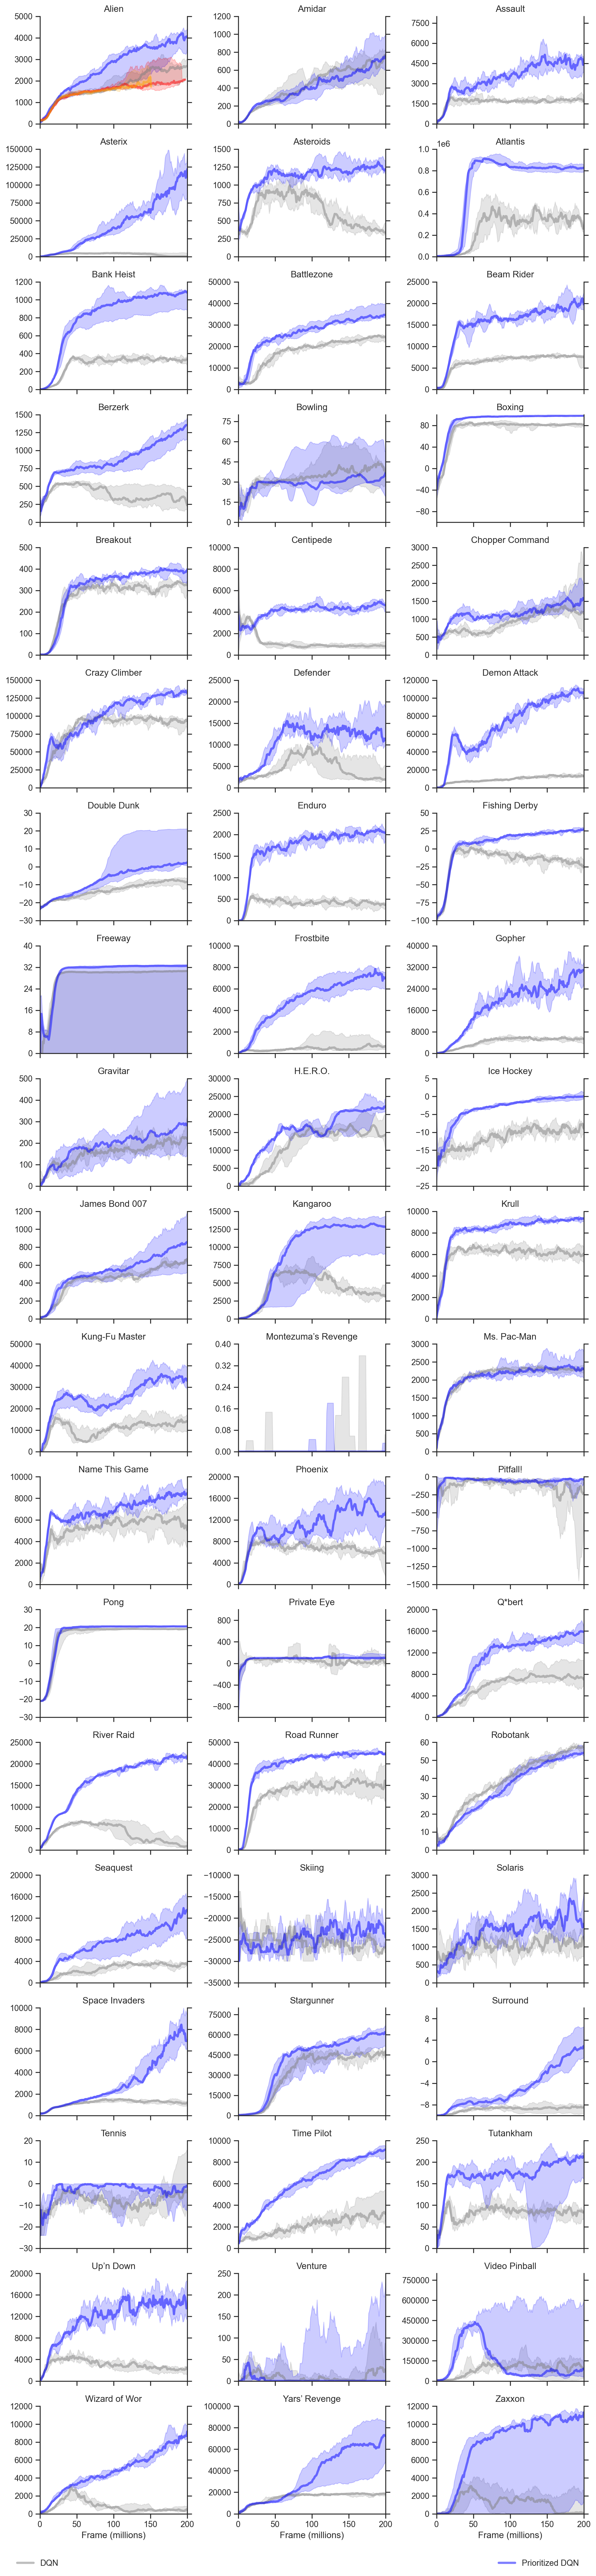

In [51]:
# This can take a very long time to run.
plot_individual(df, *make_agent_hue_kws(experiments))
pass

In [ ]:
def plot_summary(df, agent_names, hue_kws):
  df = df.query('agent_name == %s' % agent_names)
  df = df.groupby(['agent_name', 'frame', 'seed']).median().reset_index()
  df['normalized_return_percent'] = df['normalized_return'] * 100

  fig, ax = plt.subplots(figsize=(9, 6))
  sns.lineplot(
      x=df['frame_millions'],
      y=df['normalized_return_percent'],
      hue=df['agent_name'],
      estimator=np.median,
      errorbar=('ci', 100),
      alpha=0.5,
      linewidth=3,
      hue_order=agent_names,
      palette=hue_kws['color'],
      legend='brief',
      ax=ax,
  )
  ax.set_title('')
  ax.spines['right'].set_visible(True)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(True)
  ax.spines['bottom'].set_visible(True)
  ax.set_xlabel('Frame (millions)')
  ax.set_ylabel('Median human-normalized score')
  ax.set(ylim=(0, 250))

  ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
  ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
  ax.yaxis.set_major_formatter(ticker.PercentFormatter())

  legend = ax.legend(loc='upper left', title='', frameon=False)
  plt.setp(legend.get_lines(), linewidth=3, alpha=0.5)

  fig.set_facecolor('white')
  fig.tight_layout()
  return fig

In [ ]:
agent_id_to_experiment = {e['agent_id']: e for e in experiments}
agent_id_ordered_by_performance = [
    'rainbow',
    'iqn',
    'qrdqn',
    'c51',
    'prioritized',
    'double_q',
    'dqn',
]
experiments_ordered_by_performance = [
    agent_id_to_experiment[agent_id]
    for agent_id in agent_id_ordered_by_performance
]
plot_summary(df, *make_agent_hue_kws(experiments_ordered_by_performance))
pass